<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


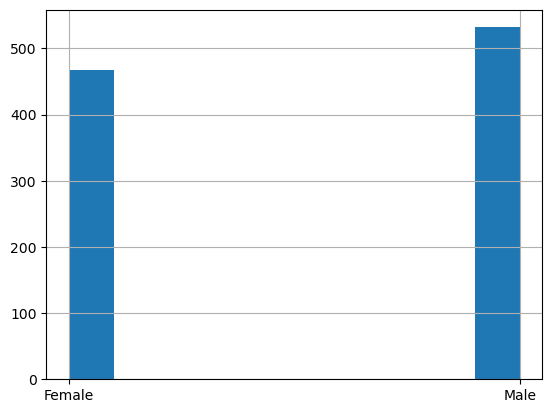

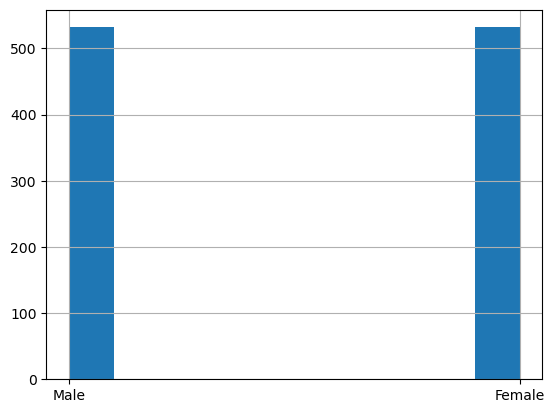

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file='/Users/jackjones/Desktop/assignment/it722/as2/1.csv'
df = pd.read_csv(file)
#df.describe(include='all')
df.info()
# df['Gender'] = df['Gender'] + np.random.normal(0, 0.1, len(df['Gender']))
df["Gender"].hist()
plt.show()

from sklearn.utils import resample

# split the dataset
df_majority = df[df.Gender=='Male']
df_minority = df[df.Gender=='Female']

# Oversample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=123) 

# Combine majority class with oversampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled["Gender"].hist()
plt.show()

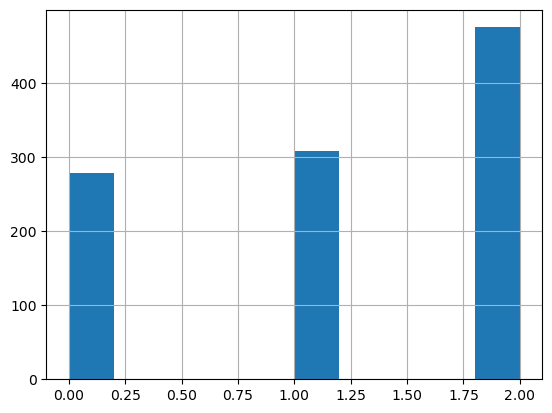

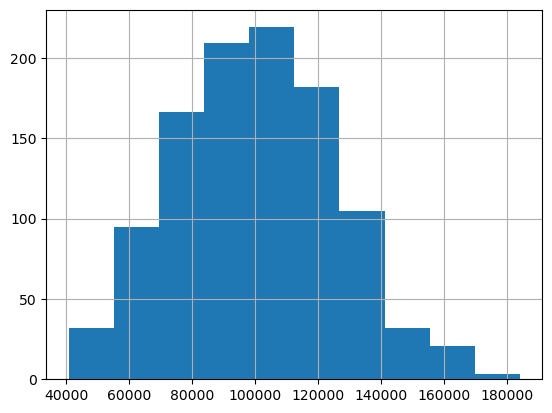

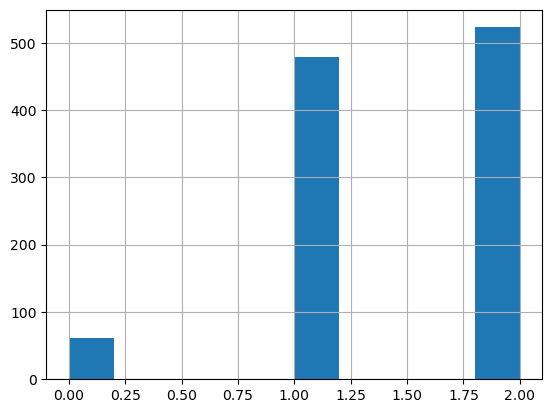

In [2]:
def divide_age(age):
    if age < 30:
        return 0
    if age >= 30 and age <45:
        return 1
    if age >= 45:
        return 2
    
df_upsampled['Age_Range'] = df_upsampled["Age"].apply(divide_age)
df_upsampled["Age_Range"].hist()
plt.show()

df_upsampled['Total_Pay'] = df_upsampled["BasePay"] + df_upsampled["Bonus"]
df_upsampled["Total_Pay"].hist()
plt.show()

def divide_pay(pay):
    if pay < 60000:
        return 0
    if pay > 100000:
        return 2
    else:
        return 1
df_upsampled['Total_Pay_Level'] = df_upsampled["Total_Pay"].apply(divide_pay)
df_upsampled["Total_Pay_Level"].hist()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 1 to 403
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   JobTitle         1064 non-null   object
 1   Gender           1064 non-null   object
 2   Age              1064 non-null   int64 
 3   PerfEval         1064 non-null   int64 
 4   Education        1064 non-null   object
 5   Dept             1064 non-null   object
 6   Seniority        1064 non-null   int64 
 7   BasePay          1064 non-null   int64 
 8   Bonus            1064 non-null   int64 
 9   Age_Range        1064 non-null   int64 
 10  Total_Pay        1064 non-null   int64 
 11  Total_Pay_Level  1064 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 108.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 1 to 403
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   JobTitle         1064

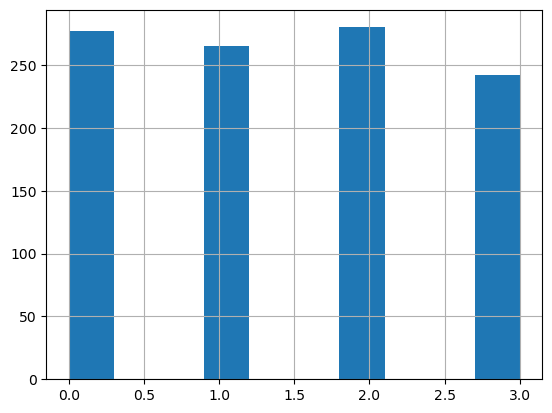

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 1 to 403
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           1064 non-null   int64
 1   Age              1064 non-null   int64
 2   PerfEval         1064 non-null   int64
 3   Education        1064 non-null   int64
 4   Seniority        1064 non-null   int64
 5   Age_Range        1064 non-null   int64
 6   Total_Pay_Level  1064 non-null   int64
dtypes: int64(7)
memory usage: 66.5 KB


In [3]:
df_upsampled.info()

def divide_gender(gender):
    if gender=='Male':
        return 0
    else:
        return 1
df_upsampled["Gender"] = df_upsampled["Gender"].apply(divide_gender)

def divide_Edu(edu):
    if edu=='High School':
        return 0
    if edu == "College":
        return 1
    if edu == "PhD":
        return 3
    else:
        return 2
df_upsampled["Education"] = df_upsampled["Education"].apply(divide_Edu)
df_upsampled.info()
df_upsampled["Education"].hist()
plt.show()




feature = df_upsampled
feature_svm = df_upsampled.drop('Total_Pay_Level', axis=1)

target = df_upsampled['Total_Pay_Level']


feature = feature.drop("JobTitle", axis=1)
feature = feature.drop("Total_Pay", axis=1)
feature = feature.drop("BasePay", axis=1)
feature = feature.drop("Bonus", axis=1)
feature = feature.drop("Dept", axis=1)
fearure_value = feature.values
target_value = target.values

feature.info()
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(feature, target)

# feature_importances = model.feature_importances_
# feature_importance_df = pd.DataFrame({'Feature': feature.columns, 'Importance': feature_importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# print(feature_importance_df)


feature.to_csv('/Users/jackjones/Desktop/assignment/it722/as3/1_spark.csv', index=False)


In [4]:
import findspark
findspark.init('/Users/jackjones/Desktop/assignment/it722/as3/spark-3.2.4-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('tree_methods_adv').getOrCreate()
df = spark.read.csv('/Users/jackjones/Desktop/assignment/it722/as3/1_spark.csv',inferSchema=True,header=True)
df.printSchema()
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressor
import plotly.figure_factory as ff


feature_columns = [col for col in df.columns if col != 'Total_Pay_Level']

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

train, test = df.randomSplit([0.8, 0.2], seed=12345)

dt = DecisionTreeClassifier(featuresCol="features", 
                            labelCol="Total_Pay_Level", 
                            maxDepth=5, 
                            maxBins=32, 
                            minInstancesPerNode=2, 
                            minInfoGain=0.0)
model = dt.fit(train)

predictions = model.transform(test)

evaluator = MulticlassClassificationEvaluator(labelCol="Total_Pay_Level", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy = {accuracy}")


from pyspark.sql.functions import col, when
# calculate TP, TN, FP, FN
confusion_matrix = predictions.select(
    when((col("Total_Pay_Level") == 1) & (col("prediction") == 1), "TP")
    .when((col("Total_Pay_Level") == 0) & (col("prediction") == 0), "TN")
    .when((col("Total_Pay_Level") == 0) & (col("prediction") == 1), "FP")
    .when((col("Total_Pay_Level") == 1) & (col("prediction") == 0), "FN")
    .alias("confusion")
).groupBy("confusion").count().collect()

TP = TN = FP = FN = 0

for row in confusion_matrix:
    metric = row["confusion"]
    if metric == "TP":
        TP = row["count"]
    elif metric == "TN":
        TN = row["count"]
    elif metric == "FP":
        FP = row["count"]
    elif metric == "FN":
        FN = row["count"]
precision = TP / (TP + FP) if TP + FP != 0 else 0
recall = TP / (TP + FN) if TP + FN != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

# output
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1_score}")
print(f"Confusion Matrix: TP={TP}, TN={TN}, FP={FP}, FN={FN}")








tree_rules = model.toDebugString
print(tree_rules)
spark.stop()

23/10/11 20:53:50 WARN Utils: Your hostname, jackdeMacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.31.137 instead (on interface en0)
23/10/11 20:53:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/11 20:53:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- Gender: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- PerfEval: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Seniority: integer (nullable = true)
 |-- Age_Range: integer (nullable = true)
 |-- Total_Pay_Level: integer (nullable = true)

Test Accuracy = 0.7409326424870466
Precision = 0.8674698795180723
Recall = 1.0
F1 Score = 0.9290322580645161
Confusion Matrix: TP=72, TN=0, FP=11, FN=0
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_ea5915c4e8d3, depth=5, numNodes=37, numClasses=3, numFeatures=6
  If (feature 1 <= 37.5)
   If (feature 4 <= 4.5)
    If (feature 4 <= 1.5)
     If (feature 1 <= 21.5)
      Predict: 0.0
     Else (feature 1 > 21.5)
      Predict: 1.0
    Else (feature 4 > 1.5)
     If (feature 4 <= 3.5)
      Predict: 1.0
     Else (feature 4 > 3.5)
      If (feature 2 <= 1.5)
       Predict: 2.0
      Else (feature 2 > 1.5)
       Predict: 1.0
   Else (feature 4 > 4.5)
    If (feature 1 <= 22.5)
     I

In [5]:
import findspark
findspark.init('/Users/jackjones/Desktop/assignment/it722/as3/spark-3.2.4-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('randomForest_methods_adv').getOrCreate()
df = spark.read.csv('/Users/jackjones/Desktop/assignment/it722/as3/1_spark.csv',inferSchema=True,header=True)
df.printSchema()

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier


feature_columns = [col for col in df.columns if col != 'Total_Pay_Level']

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

rf = RandomForestClassifier(featuresCol="features", 
                           labelCol="Total_Pay_Level",
                           numTrees=100, 
                           maxDepth=5, 
                           maxBins=32)

train, test = df.randomSplit([0.8, 0.2], seed=12345)

model = rf.fit(train)

predictions = model.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="Total_Pay_Level", 
                                              predictionCol="prediction", 
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy = {accuracy}")


from pyspark.sql.functions import col, when
# calculate TP, TN, FP, FN
confusion_matrix = predictions.select(
    when((col("Total_Pay_Level") == 1) & (col("prediction") == 1), "TP")
    .when((col("Total_Pay_Level") == 0) & (col("prediction") == 0), "TN")
    .when((col("Total_Pay_Level") == 0) & (col("prediction") == 1), "FP")
    .when((col("Total_Pay_Level") == 1) & (col("prediction") == 0), "FN")
    .alias("confusion")
).groupBy("confusion").count().collect()

TP = TN = FP = FN = 0

for row in confusion_matrix:
    metric = row["confusion"]
    if metric == "TP":
        TP = row["count"]
    elif metric == "TN":
        TN = row["count"]
    elif metric == "FP":
        FP = row["count"]
    elif metric == "FN":
        FN = row["count"]
precision = TP / (TP + FP) if TP + FP != 0 else 0
recall = TP / (TP + FN) if TP + FN != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

# output
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1_score}")
print(f"Confusion Matrix: TP={TP}, TN={TN}, FP={FP}, FN={FN}")


trees = model.trees
print("Total number of trees: ", len(trees))

# # print every tree
# for i, tree in enumerate(trees):
#     print(f"Tree {i}:")
#     print(tree.toDebugString)

spark.stop()

root
 |-- Gender: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- PerfEval: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Seniority: integer (nullable = true)
 |-- Age_Range: integer (nullable = true)
 |-- Total_Pay_Level: integer (nullable = true)

Test Accuracy = 0.7616580310880829
Precision = 0.8641975308641975
Recall = 1.0
F1 Score = 0.9271523178807948
Confusion Matrix: TP=70, TN=0, FP=11, FN=0
Total number of trees:  100


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def analysis(y_test,y_pred,y_pred_proba):
    # Precision
    precision = precision_score(y_test, y_pred, average='macro')  # For multi-class classification
    print(f"Precision: {precision:.2f}")
    
    # Recall
    recall = recall_score(y_test, y_pred, average='macro')  # For multi-class classification
    print(f"Recall: {recall:.2f}")
    
    # F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')  # For multi-class classification
    print(f"F1 Score: {f1:.2f}")
    
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

feature_svm = feature.drop('Total_Pay_Level', axis=1)
x_train, x_test, y_train, y_test = train_test_split(feature_svm, target, test_size=0.2, random_state=42)

clf = SVC(kernel='linear', random_state=42, probability=True)
clf.fit(feature_svm, target)

y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:, 1] 

print("-------------SVM---------------")
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")
analysis(y_test, y_pred, y_pred_proba)


# feature1 = 0  
# feature2 = 1

# x_min, x_max = fearure_value[:, feature1].min() - 1, fearure_value[:, feature1].max() + 1
# y_min, y_max = fearure_value[:, feature2].min() - 1, fearure_value[:, feature2].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
#                      np.arange(y_min, y_max, 0.02))

# grid_data = np.c_[xx.ravel(), yy.ravel()]
# additional_features = np.zeros((grid_data.shape[0], 4))  
# grid_data = np.hstack((grid_data, additional_features))

# Z = clf.predict(grid_data)
# Z = Z.reshape(xx.shape)

# plt.contourf(xx, yy, Z, alpha=0.8)
# plt.scatter(fearure_value[:, feature1], fearure_value[:, feature2], c=target_value, edgecolors='k', marker='o')
# plt.xlabel(f'Feature {feature1+1}')
# plt.ylabel(f'Feature {feature2+1}')
# plt.title('SVM Decision Boundary')
# plt.show()


-------------SVM---------------
Model accuracy: 65.73%
Precision: 0.44
Recall: 0.47
F1 Score: 0.46
Confusion Matrix:
[[ 0 16  0]
 [ 1 66 25]
 [ 0 31 74]]


In [7]:
import findspark
findspark.init('/Users/jackjones/Desktop/assignment/it722/as3/spark-3.2.4-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

spark = SparkSession.builder.appName('tree_methods_adv').getOrCreate()

df = spark.read.csv('/Users/jackjones/Desktop/assignment/it722/as3/1_spark.csv', inferSchema=True, header=True)

feature_columns = [col for col in df.columns if col != 'Total_Pay_Level']

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

train, test = df.randomSplit([0.8, 0.2], seed=12345)

dt = DecisionTreeClassifier(featuresCol="features", labelCol="Total_Pay_Level")

paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .addGrid(dt.maxBins, [32, 64, 128]) \
    .addGrid(dt.minInstancesPerNode, [1, 2, 4]) \
    .build()

evaluator = MulticlassClassificationEvaluator(labelCol="Total_Pay_Level", predictionCol="prediction", metricName="accuracy")

crossval = CrossValidator(estimator=dt,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)  

cvModel = crossval.fit(train)
predictions = cvModel.transform(test)
bestModel = cvModel.bestModel
print(f"Best MaxDepth: {bestModel._java_obj.getMaxDepth()}")
print(f"Best MaxBins: {bestModel._java_obj.getMaxBins()}")
print(f"Best MinInstancesPerNode: {bestModel._java_obj.getMinInstancesPerNode()}")

accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy = {accuracy}")

print(bestModel.toDebugString)

spark.stop()


Best MaxDepth: 10
Best MaxBins: 32
Best MinInstancesPerNode: 1
Test Accuracy = 0.7461139896373057
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_6a2679f6d764, depth=10, numNodes=331, numClasses=3, numFeatures=6
  If (feature 1 <= 37.5)
   If (feature 4 <= 4.5)
    If (feature 4 <= 1.5)
     If (feature 1 <= 21.5)
      If (feature 3 <= 1.5)
       Predict: 0.0
      Else (feature 3 > 1.5)
       If (feature 1 <= 19.5)
        If (feature 0 <= 0.5)
         Predict: 1.0
        Else (feature 0 > 0.5)
         If (feature 2 <= 1.5)
          Predict: 1.0
         Else (feature 2 > 1.5)
          Predict: 0.0
       Else (feature 1 > 19.5)
        Predict: 0.0
     Else (feature 1 > 21.5)
      If (feature 1 <= 33.5)
       If (feature 2 <= 1.5)
        If (feature 0 <= 0.5)
         If (feature 1 <= 30.5)
          Predict: 1.0
         Else (feature 1 > 30.5)
          If (feature 1 <= 31.5)
           Predict: 0.0
          Else (feature 1 > 31.5)
           Predict: 1.0
 